# Problem Set 2, due September 18 at 11:59pm

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of data collected in 1998
 * "Wave 2 of data" collected in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

In [21]:
# your code here
import math
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import sklearn as sk
from sklearn import linear_model
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [22]:


filename = "progresa_sample.csv"
data = pd.read_csv(filename,header=0)
list_to_use = ['mean','std']
SummaryStats = data.describe().transpose().sort_index()[list_to_use]
col_to_drop = ['year','folnum','village']
col_to_keep = list(set(SummaryStats.index) - set(col_to_drop))

SummaryStats = SummaryStats.rename(columns={'std': 'std deviation'})
SummaryStats[SummaryStats.index.isin(col_to_keep)]

#there are some columns missing, these are columns that contain text values where a mean and std deviation does not make sense.

,mean,std deviation
age,11.366460,3.167744
dist_cap,147.674452,76.063134
dist_sec,2.418910,2.234109
fam_n,7.215715,2.352900
grc,3.963537,2.499063
grc97,3.705372,2.572387
hohage,44.436717,11.620372
hohedu,2.768104,2.656106
hohsex,0.925185,0.263095
hohwag,586.985312,788.133664


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages? Hint: Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 for individuals who are poor (i.e., poor=='pobre').

Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):

| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|


In [23]:
# your code here

poor97 = data.loc[(data["poor"]=='pobre')&(data["year"]==97)]

ColumnsNames = set(poor97.columns)
ColumnsUsed = []

useThisName = False
for name in ColumnsNames:
    #Not all columns have values in them, some are categorical values. Since nothing was mentioned about encoding them to dummies
    #I'm going to ignore the columns that do not have values in them. This try exception will filter out the ones that give errors
    #when I try to calculate the mean, this may be silly for 0,1 columns
    useThisName = False
    try:
        testCalc = poor97.loc[(poor97['progresa']=='basal')][name].mean()
        useThisName = True
        ColumnsUsed.append(name)
    except:
        pass

#we can remove columns for id's folnum and village
#also drop year as we are only looking at 1997
#poor and progresa will be removed already because they are not int
ColumnsUsed.remove('year')
ColumnsUsed.remove('folnum')
ColumnsUsed.remove('village')


ColumnsUsed.sort()
myDF = pd.DataFrame(index = np.arange(len(list(ColumnsUsed))), columns=['Variable Name',
                                'Average value (Treatment villages)',
                                'Average value (Control villages)',
                                'Difference (Treat - Control)',
                                'p-value'])
myDF['Variable Name'] = list(ColumnsUsed)
myDF['Average value (Treatment villages)'] = myDF['Variable Name'].map(lambda x: poor97.loc[(poor97['progresa']=='basal')][x].mean())
myDF['Average value (Control villages)'] = myDF['Variable Name'].map(lambda x: poor97.loc[(poor97['progresa']!='basal')][x].mean())
myDF['Difference (Treat - Control)'] = myDF['Average value (Treatment villages)'] - myDF['Average value (Control villages)']
myDF['p-value'] = myDF['Variable Name'].map(lambda x: sp.stats.ttest_ind(poor97.loc[(poor97['progresa']=='basal')][x].values,
                                                                         poor97.loc[(poor97['progresa']!='basal')][x].values,
                                                                         nan_policy = 'omit',equal_var=False)[1])

myDF



,Variable Name,Average value (Treatment villages),Average value (Control villages),Difference (Treat - Control),p-value
0,age,10.716991,10.742023,-0.025032,4.783633e-01
1,dist_cap,150.829074,153.769730,-2.940656,1.146482e-03
2,dist_sec,2.453122,2.507662,-0.054540,4.266282e-02
3,fam_n,7.281327,7.302469,-0.021142,4.289667e-01
4,grc,3.531599,3.543050,-0.011450,6.895228e-01
5,grc97,3.531599,3.543050,-0.011450,6.895228e-01
6,hohage,43.648828,44.276918,-0.628090,2.259461e-06
7,hohedu,2.663139,2.590348,0.072791,1.038219e-02
8,hohsex,0.924656,0.922947,0.001709,5.721253e-01
9,hohwag,544.339544,573.163558,-28.824015,3.287285e-04


In [24]:
print('Statistically significant at 5%', list(myDF["Variable Name"][myDF['p-value']<=0.05]))


Statistically significant at 5% ['dist_cap', 'dist_sec', 'hohage', 'hohedu', 'hohwag', 'min_dist', 'sex', 'welfare_index']


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages as baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

*Discuss your results here*

A: Yes there are statistically significant differences. We observe these for dist_cap, dist_sec, hohage, hohedu, hohwag, min_dis, sex and welfare_index.

B: We want our treatment and control averages to be as close as possible because this would imply the control group is 
most likely a good counterfactual for our treatment group. However, since there are differences it implies that 
either something went wrong in our randomization or we need to look at a more complex method to get rid of this.

C: We would most likely look as a double difference, aka difference in difference, method to calculate the impact of the treatment.

### 1.4 Graphical exploration, part 1

For each level of household head education, compute the average enrollment rate in 1997. Create a scatterplot that shows this relationship. What do you notice?

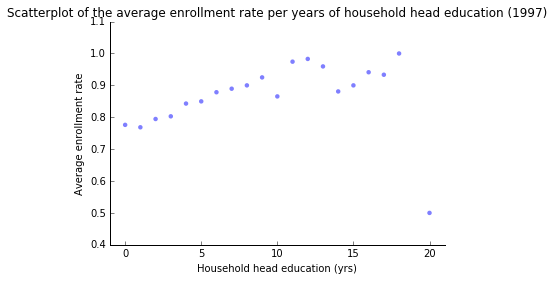

In [25]:
# Your code here
all97 = data.loc[(data["year"]==97)]
avgEnrollRate =  all97.groupby('hohedu').mean()['sc']

fig = plt.figure()
ax = plt.gca()

plt.title('Scatterplot of the average enrollment rate per years of household head education (1997)')
plt.ylabel('Average enrollment rate')
plt.xlabel('Household head education (yrs)')

plt.scatter(x=list(avgEnrollRate.index),y= avgEnrollRate, alpha=0.5, edgecolors='none')
plt.ylim(min(avgEnrollRate)-0.1,max(avgEnrollRate)+0.1)
plt.xlim(min(list(avgEnrollRate.index))-1,max(list(avgEnrollRate.index))+1,)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()

In [26]:
#let's look at what is going on in 20 years
hohedu20_97 = data.loc[(data["year"]==97)&(data["hohedu"]==20)]["sc"]
print(hohedu20_97.describe())

count    2.000000
mean     0.500000
std      0.707107
min      0.000000
25%      0.250000
50%      0.500000
75%      0.750000
max      1.000000
Name: sc, dtype: float64


*Discuss your results here*

On average the average enrollment rate seems to increase as the number of years of education of the household head increases. This seems very plausible as you would expect people with more education to value it more and thus encourage/ensure that their offspring also pursue a decent education. The average enrollment rate for household heads with 20 yrs of education seems to be an outlier, upon further investigation it seems there are only two entries where the households heads had 20 years of education. Thus it does not make sense to include this in our chart.

### 1.5 Graphical exploration, part 2

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

average for 1997 is  0.81383941106
average for 1998 is  0.829536204263
t-test p-value for comparing average enrollments between treated households in 1997 vs 1998 is 0.0442487003657


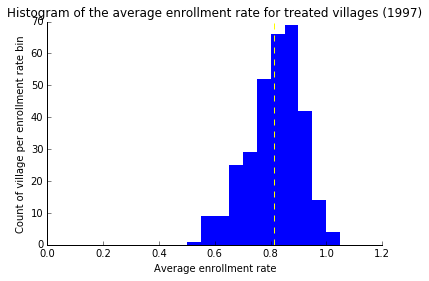

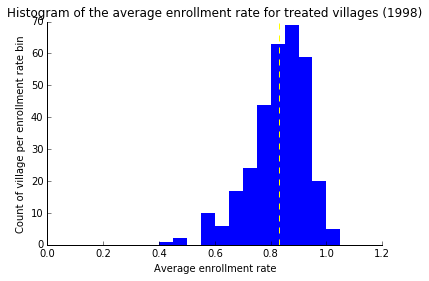

In [27]:
# Your code here
treatmentPoor97 = data.loc[(data["poor"]=='pobre')&(data["year"]==97)&(data["progresa"]=='basal')].groupby('village').mean()['sc'] 
average97 = treatmentPoor97.mean()
#print(treatmentPoor97.count())
print('average for 1997 is ',average97)
treatmentPoor98 = data.loc[(data["poor"]=='pobre')&(data["year"]==98)&(data["progresa"]=='basal')].groupby('village').mean()['sc']
average98 = treatmentPoor98.mean()
#print(treatmentPoor98.count())
print('average for 1998 is ',average98)
print('t-test p-value for comparing average enrollments between treated households in 1997 vs 1998 is',
      sp.stats.ttest_ind(treatmentPoor97.values,treatmentPoor98.values,nan_policy = 'omit')[1])

binwidth = 0.05
min_bin = 0.0
max_bin = 1.1

#plotting data for 1997

plt.hist(treatmentPoor97.values, bins=np.arange(min_bin, max_bin + binwidth, binwidth),color = 'blue',edgecolor = "none")
#not norming them as both 1998 and 1997 have 320 observations
ax = plt.gca()

plt.title('Histogram of the average enrollment rate for treated villages (1997)')
plt.ylabel('Count of village per enrollment rate bin')
plt.xlabel('Average enrollment rate')
ylim97 = ax.get_ylim()

plt.plot((average97, average97), ylim97, 'k--',color = 'yellow')
plt.color = "Blue"

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off

plt.show()


#now to plot data for 1998
plt.hist(treatmentPoor98.values, bins=np.arange(min_bin, max_bin + binwidth, binwidth),color = 'blue',edgecolor = "none")
ax2 = plt.gca()

plt.title('Histogram of the average enrollment rate for treated villages (1998)')
plt.ylabel('Count of village per enrollment rate bin')
plt.xlabel('Average enrollment rate')


ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.tick_params(axis='x',which='both',top='off') # labels along the bottom edge are off
plt.tick_params(axis='y',which='both',right='off') # labels along the bottom edge are off
ylim98 = ax2.get_ylim()
plt.plot((average98, average98), ylim98, 'k--',color = 'yellow')
plt.show()


*Discuss your results here*

Looking at the resulting histograms we can see that in 1998 the average enrollment rate tends to be higher than for 1997, the distribution is more skewed to the right, slightly so. Furthemore there is a difference in the averages of the two data sets,0.8138 for 1997 and 0.8295 for 1998. Using a t-test we get a p-value of 0.044, which is significant at the 0.05 threshold level. So we can conclude there is a different which is significant, even if slightly so, given how close it is to 0.05. Thus we can reject the null hypothesis that the two averages are equal.

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on the poor (those with poor=='pobre'), since only the poor were eligible to receive the PROGRESA assistance.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [28]:
# Your code here
treatmentPoor98 = data.loc[(data["poor"]=='pobre')&(data["year"]==98)&(data["progresa"]=='basal')]['sc']
treatmentPoor98_avg = treatmentPoor98.mean()
print('average enrollment rate for treatment villages for 1998 is ',treatmentPoor98_avg)
print('count of observations in treatment group for 1998 is', treatmentPoor98.count())

controlPoor98 = data.loc[(data["poor"]=='pobre')&(data["year"]==98)&(data["progresa"]!='basal')]['sc']
controlPoor98_avg = controlPoor98.mean()
print('average enrollment rate for control villages for 1998 is ',controlPoor98_avg)
print('count of observations in control group for 1998 is', controlPoor98.count())
print('\n')
print('the difference between the averages of the treated group and the control group for 1998 is ',
      treatmentPoor98_avg -controlPoor98_avg )

print('\n')
print('since difference in number of observations between two groups we use Welsch\'s t-test')
print('t-test p-value for comparing average enrollments between treated and control villages in 1998 is',
      sp.stats.ttest_ind(treatmentPoor98.values,
                         controlPoor98.values,
                         nan_policy = 'omit',
                         equal_var=False)[1])


average enrollment rate for treatment villages for 1998 is  0.846479121395
count of observations in treatment group for 1998 is 17027
average enrollment rate for control villages for 1998 is  0.80763695673
count of observations in control group for 1998 is 10423


the difference between the averages of the treated group and the control group for 1998 is  0.0388421646651


since difference in number of observations between two groups we use Welsch's t-test
t-test p-value for comparing average enrollments between treated and control villages in 1998 is 2.96550729885e-16


*Discuss your results here*

We can see that there is a difference of 3.88% between the average enrollment rate of the treatment group and the control group for 1998. Using Welsh's t-test we get a p-value of 2.965e-16 which is statistically significant at both 5% and 1% levels. Thus according to this method it would be statistically significant. However, given what we saw up above, that some of the baseline 1997 averages across are other variables are statistically different, perhaps we need to look at a double difference.

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [29]:
# Your code here

#we need to transform the progresa variable in our data from from a text to a dummy variable ca;;ed "treatment_control"
data["treatment_control"] = pd.get_dummies(data['progresa'])["basal"]
#now we filter poor for 98

Poor98 = data.loc[(data["poor"]=='pobre')&(data["year"]==98)]
#Poor98.dropna(thresh=1)
Poor98.dropna(axis=0, how='any')
#need some more imports
# will add these to the top
#http://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
#https://stackoverflow.com/questions/44460584/multiple-linear-regression-with-statsmodels-python


model = smf.ols(formula="sc ~ treatment_control", data=Poor98).fit()
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Mon, 18 Sep 2017   Prob (F-statistic):           6.64e-17
Time:                        20:08:57   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.8076      0.00

*Discuss your results here*
* Q: Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that your grandmother could understand, using appropriate units. **Answer: The average enrollment rate is 3.88% higher in treated villages than it is in control villages. Thus it the progresa programme increases the likelihood of enrollment by 3.88%**

* Q: How does your regression estimate compare to your t-test estimate from part 2.1? **Answer: The estimate of the treatment_control slope is 0.0388, which is the same as the difference we calculated between the averages for 2.1. Furthermore, the p-value is also very small (0.000) in the regression thus I would say it is also significant.**

* Q: Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? **Answer: Based on the model yes we can reject the null hypothesis, that the average enrollment rates of the treatment and control groups are the same.**

* Q: What is the counterfactual assumption underlying this regression? **Answer: The counterfactual underlying this regression is that in the absence of treatment the average enrollment rates between the treatment and control groups are the same. That is that the cotrol group represents the treatment group in every way, but without having received the treatment.**



### 2.3 Multiple Regression

Re-run the above regression estimated but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?

In [30]:
# Your code here

print(' + '.join(map(str, list(Poor98.columns))))
print('\n')

#https://www.datarobot.com/blog/multiple-regression-using-statsmodels/


model = smf.ols(formula="sc ~ treatment_control + sex + indig + dist_sec + grc + fam_n + min_dist + dist_cap +\
                hohedu + hohwag + welfare_index + hohsex + hohage + age + village ", data=Poor98).fit()
print(model.summary())


year + sex + indig + dist_sec + sc + grc + fam_n + min_dist + dist_cap + poor + progresa + hohedu + hohwag + welfare_index + hohsex + hohage + age + village + folnum + grc97 + sc97 + treatment_control


                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     790.5
Date:                Mon, 18 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:08:58   Log-Likelihood:                -6928.6
No. Observations:               27200   AIC:                         1.389e+04
Df Residuals:                   27184   BIC:                         1.402e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
       

*Discuss your results here*
* How do the controls affect the point estimate of treatment effect? **Answer:The estimate for the coefficient for our treatment_control group changed from 0.0388 to 0.0317**

* How do the controls affect the standard error on the treatment effect? **Answer: The standard error of the treatment_control variable has decreased from 0.005 to 0.004, thus a small impact**

* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3? **Answer:I would say that in the multiple regression (2.3) we probably explain more of the intercept by including the other control variables, as can be seen by the small change in the coefficient for our treatment_control group. Thus also the variables seem to be somewhat independent, which is a good thing given it means progresa has the impact and not other things per se.**

### 2.4 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. The difference between these two differences is your estimate.

* What is your estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [31]:
# Your code here
Poor98 = data.loc[(data["poor"]=='pobre')&(data["year"]==98)]
Poor97 = data.loc[(data["poor"]=='pobre')&(data["year"]==97)]

Control_98_Average = Poor98.loc[(Poor98['treatment_control']==0)].mean()['sc']
Treatment_98_Average = Poor98.loc[(Poor98['treatment_control']==1)].mean()['sc']

Control_97_Average = Poor97.loc[(Poor97['treatment_control']==0)].mean()['sc']
Treatment_97_Average = Poor97.loc[(Poor97['treatment_control']==1)].mean()['sc']

Treated_diff = Treatment_98_Average - Treatment_97_Average
Control_diff = Control_98_Average - Control_97_Average

print('Control enrollment average for 1998 is:',Control_98_Average)
print('Control enrollment average for 1997 is:',Control_97_Average)
print('Difference in control groups is       :', Control_98_Average - Control_97_Average)
print('Treated enrollment average for 1998 is:',Treatment_98_Average)
print('Control enrollment average for 1997 is:',Treatment_97_Average)
print('Difference in treated groups is       :', Treatment_98_Average - Treatment_97_Average)
print('Double difference is                  :', Treated_diff - Control_diff)


Control enrollment average for 1998 is: 0.80763695673
Control enrollment average for 1997 is: 0.815186003058
Difference in control groups is       : -0.00754904632728
Treated enrollment average for 1998 is: 0.846479121395
Control enrollment average for 1997 is: 0.822696887403
Difference in treated groups is       : 0.023782233992
Double difference is                  : 0.0313312803193


*Discuss your results here*

The double difference is 0.0313, which is closer to the multiple regression estimate of 0.0317 than it is to the single difference estimate of 0.0388 calculated before.

The counterfactual underlying this difference is that in the absence of treatment the difference between the average enrollment rate of the treatment group for years 1998 vs 1997 would be the same as the difference between the average enrollment rates for the control group for year 1998 vs 1997. Thus from 1997 to 1998, the change in the average enrollment rate would be the same between the two groups in the absence of treatment. 

### 2.5 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences framework. Include at least 5 control variables.

* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* How do these estimates of the treatment effect compare to the estimates based on the simple difference?
* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences?
* What is the counterfactual assumption underlying this regression? 

In [32]:
# Your code here

Poor = data.loc[(data["poor"]=='pobre')]
Poor.dropna(axis=0, how='any')
#according to page 72 of world bank document we get the DD by looking at the coefficient of the term C(treatment_control)*C(year)

model = smf.ols(formula="sc ~ treatment_control +C(treatment_control)*C(year) + year + sex + indig +\
                dist_sec + grc + fam_n + min_dist + dist_cap +\
                hohedu + hohwag + welfare_index + hohsex + hohage + age ", data=Poor).fit()

# model = smf.ols(formula="sc ~ treatment_control +treatment_control*year + year + sex + indig +\
#                 dist_sec + grc + fam_n + min_dist + dist_cap +\
#                 hohedu + hohwag + welfare_index + hohsex + hohage + age ", data=Poor).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1631.
Date:                Mon, 18 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:09:02   Log-Likelihood:                -15320.
No. Observations:               57938   AIC:                         3.067e+04
Df Residuals:                   57921   BIC:                         3.083e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

*Discuss your results here*
* What is your estimate of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating. **Answer: The double difference would be the coefficient of our treatmenat_control*time variable. This coefficient is 0.0292. This implies that the average enrollment will increase by 2.92% from year 97 to 98 if the specific household is in the treatment group as opposed to the control group. The standard error is 0.5%**

* How do these estimates of the treatment effect compare to the estimates based on the simple difference? **Answer: The simple difference regression was 0.0388 for just the treatment_control as control variable. The multiple regression stated the difference as 0.0317. The standard errors are between 0.005 and 0.004.**

* How do these estimates compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences? **Answer: The DD method from 2.4 showed 0.0313 whereas here we see 0.0292. The difference is explained through the fact that we now have additional control variables in our equation. Whilst the difference is small, the fact that adding control variables creates this difference shows that there is some correlation between our treatmenat_control variable and the other variables.**

* What is the counterfactual assumption underlying this regression? **Answer: The counterfactual underlying this difference is that in the absence of treatment the difference between the average enrollment rate of the treatment group for years 1998 vs 1997 would be the same as the difference between the average enrollment rates for the control group for year 1998 vs 1997. Thus from 1997 to 1998, the change in the average enrollment rate would be the same between the two groups in the absence of treatment. **

### 2.6 Spillover effects

Thus far, we have focused on the impact of PROGRESA on poor households. Repeat your analysis in 2.5, instead focusing on the impact of PROGRESA on non-poor households. 
* Do you observe any impacts of PROGRESA on the non-poor?
* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.

In [33]:
# Your code here

NonPoor = data.loc[(data["poor"]!='pobre')]
NonPoor.dropna(axis=0, how='any')
#according to page 72 of world bank document we get the DD by looking at the coefficient of the term C(treatment_control)*C(year)

model = smf.ols(formula="sc ~ treatment_control +C(treatment_control)*C(year) + year + sex + indig +\
                dist_sec + grc + fam_n + min_dist + dist_cap +\
                hohedu + hohwag + welfare_index + hohsex + hohage + age ", data=NonPoor).fit()

# model = smf.ols(formula="sc ~ treatment_control +treatment_control*year + year + sex + indig +\
#                 dist_sec + grc + fam_n + min_dist + dist_cap +\
#                 hohedu + hohwag + welfare_index + hohsex + hohage + age ", data=Poor).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.337
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     327.3
Date:                Mon, 18 Sep 2017   Prob (F-statistic):               0.00
Time:                        20:09:03   Log-Likelihood:                -3267.3
No. Observations:               10319   AIC:                             6569.
Df Residuals:                   10302   BIC:                             6692.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

*Discuss your results here*

* Do you observe any impacts of PROGRESA on the non-poor? **Answer: We see a very small impact on the non-poor households. That is from year 97 to 98 the average enrollment rate of the treatment decreased by 0.0034 compared to the average enrollment rate for this same period for the control group. However, the p-value for this statistic is not significant and thus we can say that the averages should be the same. Thus we can't reject the null hypothesis **

* Regardless of whether you find evidence of spillovers, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented. **Answer:1. people talk and thus people can move from one village to another if they determine there is a progresa payment. 2. people can try and spoof the system by pretending to be poor when in fact they are non-poor **

### 2.7 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 
* Describe one other way that you might analyze these data to further investigate the causal impact of Progresa on enrollment, and clearly state the counterfactual assumption you would need to make for that approach to be valid.  *(Hint: Consider using the non-poor in your analysis)*

*Discuss your results here*

Yes, it seems that Progressa had a causal impact on the enrollment rates of poor households when we look at the double difference of 2.92% calculated in question 2.5. Furthermore, the fact that we could not see material spill-over effects also indicates that the test conditions seem to have been good.

We could look at the double difference between treatment and control groups from 97 to 98 for poor and subtract from this the double difference between treatment and control groups from 97 to 98 for non-poor. The counterfactual is that in the absence of treatment the change in average enrollment rate per household from 97 to 98 for poor groups, should be the same as for non-poor groups.